**The MPG (Miles Per Gallon) dataset is a well-known dataset in machine learning that relates to cars and their various features. This dataset is typically used for regression analysis and predicting the fuel consumption of cars. It contains features such as engine type, number of cylinders, horsepower, car weight, and other attributes that help in predicting fuel consumption.**

**Seaborn and Pandas are both used for data analysis in Python, but they have different roles. Here, Pandas is used for managing and processing DataFrame data, while Seaborn is used for visualization.**
**NumPy is a powerful library for numerical computing and working with multidimensional arrays in Python.**
**Matplotlib is a library for creating plots and visualizing data in Python.**

In [126]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading and Viewing the Dataset(Download dataset file from git or Kaggel)**

In [132]:
df=pd.read_csv('~/Downloads/DataSet/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [133]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Finding missing values in each column.There is no empty field here.**

In [135]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [136]:
df['horsepower'] = df['horsepower'].replace('?', 0).astype(int)

**A heatmap is one of the best methods for visualizing the correlation between numerical variables in a dataset. In this method, the correlation matrix is displayed using different colors, where high correlation values (positive or negative) are highlighted with specific colors.**

In [150]:
df1=df
df1=df1.drop(columns=['car name'])
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.754276,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.418636
weight,-0.831741,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,1.000000


plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(),annot=True)


In [151]:
target=df1['mpg']   #mpg column is target so we should remove it to prevent overfitting.

In [155]:
#Check the feature importance with RandomForestRegressor

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Checking feature importance
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

# Ensuring that the number of indices matches
for i in sorted_idx[:X_train.shape[1]]:
    print(f"{X_train.columns[i]}: {importances[i]:.4f}")



cylinders: 0.3707
weight: 0.2938
horsepower: 0.1531
model year: 0.1415
displacement: 0.0308


**The features weight and displacement have almost similar importance and both have a significant impact on mpg.**
**Suggestion: Remove one of these two, not both!**
**Error: If you remove both, the model will lose important information.**

In [140]:
df1=df1.drop(columns=['mpg','displacement'])

### Splitting Data into Training and Testing Sets ###

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1,target,test_size=0.3)

### LinearRegression Model ###

In [142]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
predicted=lr.predict(x_test)

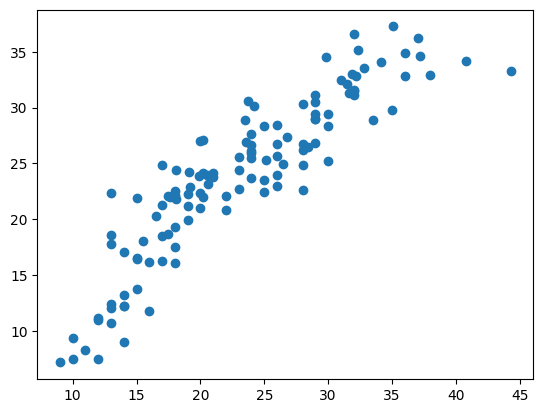

In [143]:
plt.scatter(y_test,predicted)

In [144]:
from sklearn.metrics import  mean_squared_error, r2_score

print(mean_squared_error(y_test,predicted))
print(r2_score(y_test, predicted))

11.606064613995283
0.7969746733350951


### Adding Non-linear Features (Polynomial Features) ###

**Sometimes, the relationship between mpg and the features is not linear. Adding the square of the features (x²) can make the model more accurate.**

**Method: Create polynomial features ( weight², horsepower²) and test their impact.**

In [145]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Creating polynomial features using training and testing data
poly = PolynomialFeatures(degree=2, include_bias=False)

# Converting training and testing data
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Training the model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

print(f"Polynomial Regression (Degree=2) → MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")


Polynomial Regression (Degree=2) → MSE: 7.4488, R²: 0.8697


### RandomForestRegressor Model ###

In [146]:
from sklearn.ensemble import RandomForestRegressor

#  Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Prediction and evaluation
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest → MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


Random Forest → MSE: 7.3282, R²: 0.8718


### GradientBoostingRegressor Model ###

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#  Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Training the model
gb.fit(x_train, y_train)

# Prediction and evaluation
y_pred_gb = gb.predict(x_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting → MSE: {mse_gb:.4f}, R²: {r2_gb:.4f}")


Gradient Boosting → MSE: 6.6107, R²: 0.8844


**If you want to make a more precise comparison or improve the models,By using GridSearchCV or RandomizedSearchCV, we can optimize the model parameters and increase accuracy.**

### Code for setting up the Gradient Boosting model with GridSearchCV ###


**For optimizing the Gradient Boosting model, there are several important parameters that we can adjust:**

**n_estimators: The number of trees.**
**learning_rate: The learning rate, which has a significant impact on the model.**
**max_depth: The depth of each tree.**
**subsample: The percentage of data sampled for each tree.**

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# The parameters we want to search for.
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Building the Gradient Boosting model.
gb = GradientBoostingRegressor(random_state=42)

#GridSearchCV for optimization.
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#training model
grid_search.fit(x_train, y_train)

# The best parameters and the result.
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", grid_search.best_score_)

# Prediction with the best model
y_pred_gb = grid_search.best_estimator_.predict(x_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Optimized Gradient Boosting → MSE: {mse_gb:.4f}, R²: {r2_gb:.4f}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best score (MSE): -9.209404810022914
Optimized Gradient Boosting → MSE: 6.4718, R²: 0.8868


### Code for setting up the Random Forest model with GridSearchCV ###


**For optimizing the Gradient Boosting model, there are several important parameters that we can adjust:**

**n_estimators: The number of trees.**
**max_depth: The depth of the trees.**
**min_samples_split: The minimum number of samples required to split each node.**
**min_samples_leaf: The minimum number of samples required for each leaf.**

**GridSearchCV is used to search all possible combinations of parameters, but it can be time-consuming.**

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#The parameters we want to search for.
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# # Building the RandomForest model.
rf = RandomForestRegressor(random_state=42)

#GridSearchCV for optimization.
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#training model
grid_search_rf.fit(x_train, y_train)

# The best parameters and the result.
print("Best parameters (Random Forest):", grid_search_rf.best_params_)
print("Best score (MSE) (Random Forest):", grid_search_rf.best_score_)

# Prediction with the best model
y_pred_rf = grid_search_rf.best_estimator_.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Optimized Random Forest → MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


Best parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score (MSE) (Random Forest): -9.561763011567873
Optimized Random Forest → MSE: 7.1703, R²: 0.8746


### Comparison and plotting the chart ###

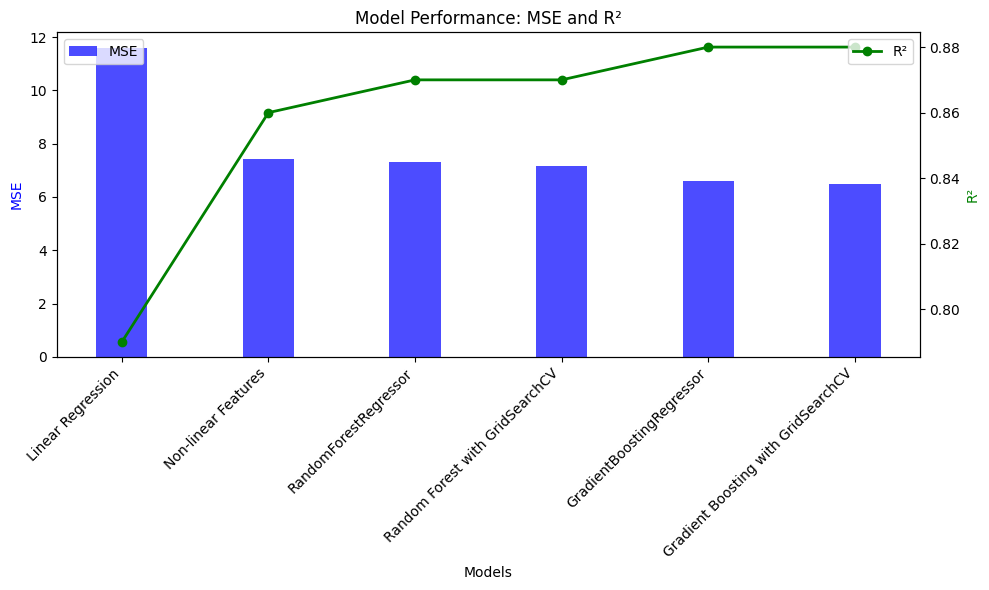

In [161]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Non-linear Features', 'RandomForestRegressor', 
          'Random Forest with GridSearchCV','GradientBoostingRegressor', 'Gradient Boosting with GridSearchCV', ]

# MSE and R² values for each model (example values, replace with your actual results)
mse_values = [11.60, 7.44, 7.32, 7.17, 6.61, 6.47]  # Replace with your MSE results
r2_values = [0.79, 0.86, 0.87, 0.87, 0.88, 0.88]  # Replace with your R² results

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for MSE
bar_width = 0.35
index = range(len(models))

bar1 = ax1.bar(index, mse_values, bar_width, label='MSE', color='b', alpha=0.7)

# Line chart for R²
ax2 = ax1.twinx()
line2 = ax2.plot(index, r2_values, label='R²', color='g', marker='o', linestyle='-', linewidth=2)

# Adding labels and title
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='b')
ax2.set_ylabel('R²', color='g')
ax1.set_title('Model Performance: MSE and R²')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=45, ha='right')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


### Conclusion ###


**Initially, I used the Linear Regression model, and to improve performance after removing some low-importance features from the dataset, I explored other models. Based on the results, the GradientBoostingRegressor algorithm provided better results compared to Random Forest. After that, to improve accuracy, GridSearchCV and finer parameter tuning in the two recent algorithms resulted in a slight improvement.
After optimizing the model, the MSE (Mean Squared Error) decreased and the R² (Coefficient of Determination) increased. This means more accurate and better predictions.**